# <font size="+3" color=black ><b> <center><u>COVID DETECTION USING LUNGS XRAY IMAGES</u></center></b></font><br><a id="top"></a>

<font size="+3" color="Red"><b>OVERVIEW</b></font>

* Importing Libraries
* Reading Datasets
* Xray Image without Covid
* Xray Image with Covid
* Training the Model
* Summary of model
* Plotting the Graph
* Accuracy
* Labeling and Prediction
* Confusion Matrix

# <font color='Red'> Importing the Libraries </font>

In [8]:

#IMPORTING LIBRARIES
import numpy as np 
import pandas as pd 

from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/covid-19-x-ray-10000-images/train_covid19.py
/kaggle/input/covid-19-x-ray-10000-images/covid19.model
/kaggle/input/covid-19-x-ray-10000-images/requirements.txt
/kaggle/input/covid-19-x-ray-10000-images/generate_images.py
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0266-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0253-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0265-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0243-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0217-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0223-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0227-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0235-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0218-0001.jpeg
/kaggle/input/covid-19-x-ray-10000-images/dataset/normal/IM-0216-0001.jpeg
/kaggle/input/c

# <font color='Red'> Reading Dataset </font>

In [9]:
data = '/kaggle/input/covid-19-x-ray-10000-images/dataset'

In [10]:
os.listdir(data)

['normal', 'covid']

## <font color='Red'> XRAY Image Without Covid </font>

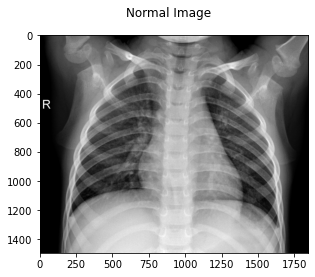

In [11]:
normal_images = []
for img_path in glob.glob(data + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('Normal Image')
plt.imshow(normal_images[0], cmap='gray')


## <font color='Red'> XRAY Image With COVID</font>

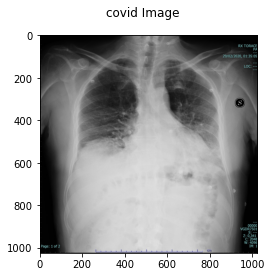

In [12]:
covid_images = []
for img_path in glob.glob(data + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid Image')
plt.imshow(covid_images[0], cmap='gray')

In [13]:
Image_Width = 150
Image_Height = 150
Cannels = 3

INPUT_SHAPE = (Image_Width, Image_Height, Cannels)
NB_CLASSES = 2
EPOCHS = 45
BATCH_SIZE = 6

## <font color='Red'> Training The Model </font>






In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [15]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

## <font color='Red'> Model Summary </font>

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 250)       144250    
_________________________________________________________________
activation_2 (Activation)    (None, 70, 70, 250)       0

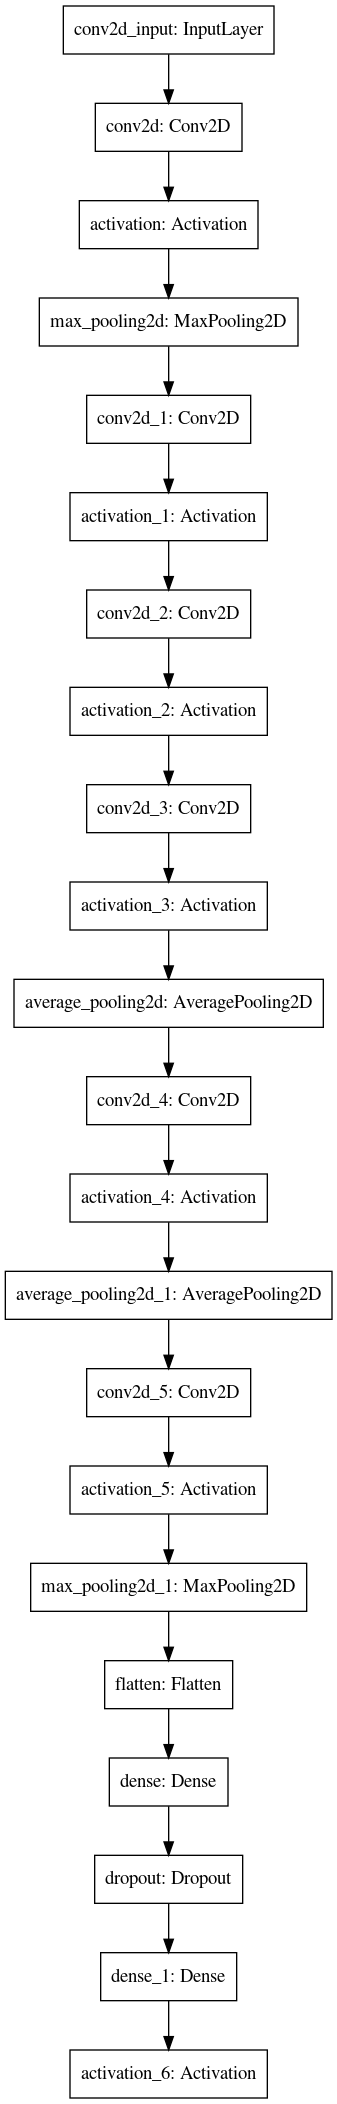

In [16]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data, 
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/45
12/12 [==============================] - 12s 1s/step - loss: 1.1836 - accuracy: 0.5735 - val_loss: 0.6130 - val_accuracy: 0.7083
Epoch 2/45
12/12 [==============================] - 12s 1s/step - loss: 0.7394 - accuracy: 0.6912 - val_loss: 0.6303 - val_accuracy: 0.7083
Epoch 3/45
12/12 [==============================] - 12s 1s/step - loss: 0.5419 - accuracy: 0.7206 - val_loss: 0.6707 - val_accuracy: 0.7917
Epoch 4/45
12/12 [==============================] - 12s 1s/step - loss: 0.6046 - accuracy: 0.8088 - val_loss: 0.5305 - val_accuracy: 0.7083
Epoch 5/45
12/12 [==============================] - 12s 1s/step - loss: 0.5255 - accuracy: 0.7647 - val_loss: 0.3415 - val_accuracy: 0.9167
Epoch 6/45
12/12 [==============================] - 12s 1s/step - loss: 0.5292 - accuracy: 0.8088 - val_loss: 0.3414 - val_accuracy: 0.7917
Epoch 7/45
12/12 [==============================] - 12s 1s/step - loss: 0.2344 -

## <font color='Red'> Plotting Graph - Accuracy and Loss</font>

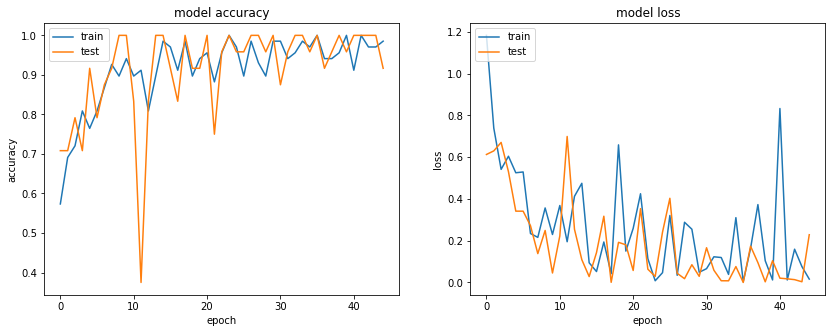

In [18]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

## <font color='Red'> Accuracy </font>

In [19]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9852941036224365
validation_accuracy 0.9166666865348816


## <font color='Red'> Labeling & Prediction </font>

In [20]:
label = validation_generator.classes
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']


## <font color='red'>Confusion Matrix </font>
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

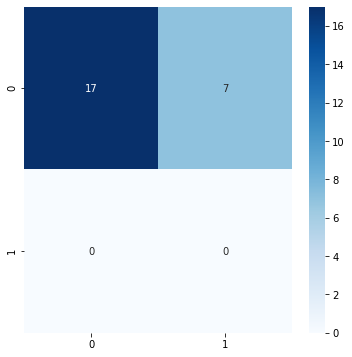

In [21]:
plt.figure(figsize = (6,6))
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(predicted_class_indices,label)
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , annot = True, fmt='')

In [22]:
correct = np.nonzero(predicted_class_indices == label)[0]
pred_class = predicted_class_indices.astype(int)

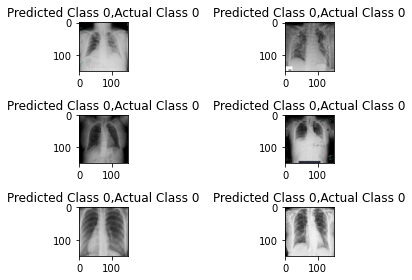

In [23]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(validation_generator[0][0][c].reshape(150,150,3))
    plt.title("Predicted Class {},Actual Class {}".format(pred_class.reshape(1,-1)[0][c], label[c]))
    plt.tight_layout()
    i += 1

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>